In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos
datos = np.loadtxt("venta_propiedades.csv", delimiter=",")

# Graficar datos
plt.figure(figsize=(6, 6))
# .scatter gráfico de dispersión
# datos[:, 0] y datos[:, 1]  las coordenadas de los puntos en el gráfico
# c=np.linspace(0, 1, datos.shape[0]) colores a los puntos en la gráfica 
# s tamaño y alpha transparencia
plt.scatter(datos[:, 0], datos[:, 1], 
            c=np.linspace(0, 1, datos.shape[0]), s=300, alpha=0.6)
plt.xlabel("Antigüedad de la Construcción en Años", fontsize=14)
plt.ylabel("Precio de Casa en Pesos (1:100,000)", fontsize=14)
plt.box(False)
plt.show()

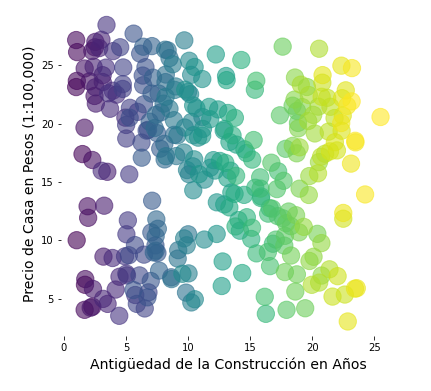

<h1 style="color:purple">Métricas de Distancia entre Vecinos</h1>
<h1>
    <span style="color:black">DBSCAN</span> 
    <span style="color:purple">- Scikit-learn</span>
</h1>



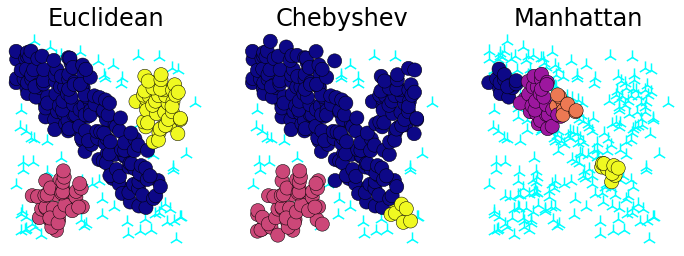

In [2]:
from sklearn.cluster import DBSCAN

# Cargar datos
datos = np.loadtxt("venta_propiedades.csv", delimiter=",")

# Identificar Clusters con diferentes distancias
distancias = ["euclidean", "chebyshev", "manhattan"]

# euclidiana sqrt((x2 - x1)^2 + (y2 - y1)^2)
# chebyshev max(abs(x2 - x1), abs(y2 - y1))
# manhattan abs(x2 - x1) + abs(y2 - y1)

fig = plt.figure(figsize=(12, 4))

#  colores ("colormap") en "plasma" 
plt.set_cmap("plasma")
for d in range(len(distancias)):

    # DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para identificar clusters (grupos) en los datos , basandose densidad de puntos en el espacio

    # 2: Este es el valor de eps (epsilon),  la distancia máxima para considerar dos puntos en el mismo vecindario.

    # min_examples = 10 número mínimo de puntos dentro del vecindario 

    
    clusters = DBSCAN(2, min_samples=10, 
                      metric=distancias[d]).fit_predict(datos)
    ax = fig.add_subplot(1, 3, d+1)
    # puntos considerados ruido
    ax.scatter(datos[clusters==-1][:, 0], datos[clusters==-1][:, 1], 
               c="cyan", s=200, marker="2")
    # puntos pertenencientes a clusters
    ax.scatter(datos[clusters>=0][:, 0], datos[clusters>=0][:, 1], 
               c=clusters[clusters>=0], s=200, 
               linewidth=0.5, edgecolors="black")
    ax.set_title(distancias[d].capitalize(), fontsize=24)
    ax.axis("off")
    
plt.show()

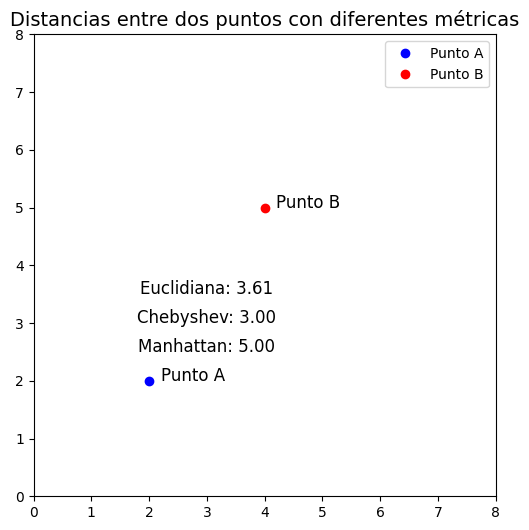

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Coordenadas de dos puntos (punto A y punto B)
punto_A = np.array([2, 2])
punto_B = np.array([4, 5])

# Calcular la distancia Euclidiana entre los dos puntos
distancia_euclidiana = np.sqrt((punto_B[0] - punto_A[0])**2 + (punto_B[1] - punto_A[1])**2)

# Calcular la distancia de Chebyshev
distancia_chebyshev = np.max(np.abs(punto_B - punto_A))

# Calcular la distancia de Manhattan
distancia_manhattan = np.sum(np.abs(punto_B - punto_A))

# Crear una figura para visualizar los resultados
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar los puntos A y B en el gráfico
ax.plot(punto_A[0], punto_A[1], 'bo', label='Punto A')
ax.plot(punto_B[0], punto_B[1], 'ro', label='Punto B')

# Etiquetas de puntos A y B
ax.text(punto_A[0] + 0.2, punto_A[1], 'Punto A', fontsize=12)
ax.text(punto_B[0] + 0.2, punto_B[1], 'Punto B', fontsize=12)

# Mostrar las distancias calculadas
ax.text((punto_A[0] + punto_B[0]) / 2, (punto_A[1] + punto_B[1]) / 2, f'Euclidiana: {distancia_euclidiana:.2f}', fontsize=12, ha='center')
ax.text((punto_A[0] + punto_B[0]) / 2, (punto_A[1] + punto_B[1]) / 2 - 0.5, f'Chebyshev: {distancia_chebyshev:.2f}', fontsize=12, ha='center')
ax.text((punto_A[0] + punto_B[0]) / 2, (punto_A[1] + punto_B[1]) / 2 - 1.0, f'Manhattan: {distancia_manhattan:.2f}', fontsize=12, ha='center')

# Configurar el gráfico
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.legend()

# Título
plt.title("Distancias entre dos puntos con diferentes métricas", fontsize=14)

plt.show()


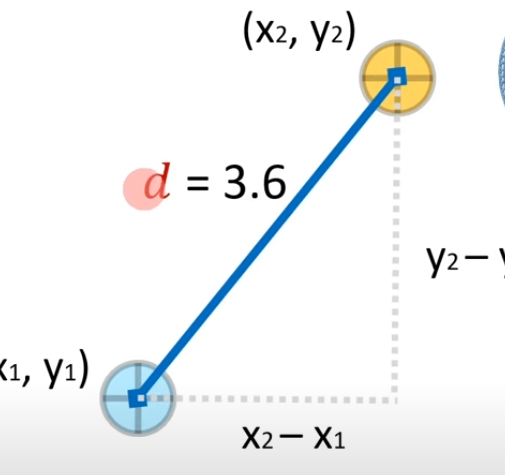

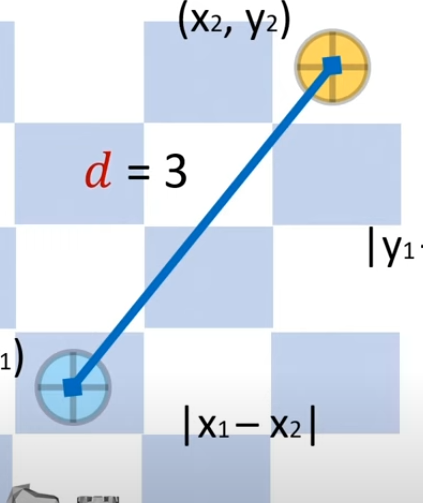

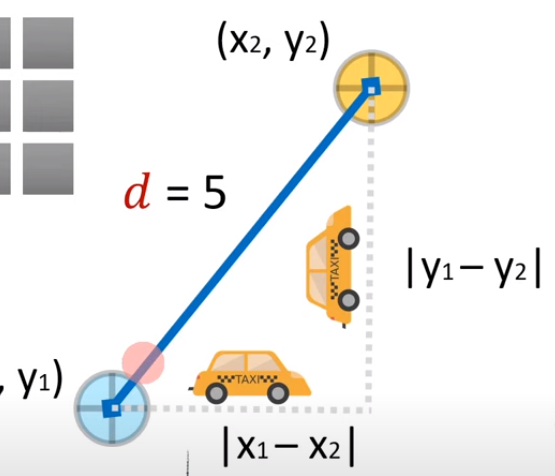